<h1 style='color: blue; font-size: 34px; font-weight: bold;'> Planejamento de Experimentos 
</h1>


# <font color='red' style='font-size: 30px;'>1.0 Introdução   </font>
<hr style='border: 2px solid red;'>




<p style='font-size: 18px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'>    
<i> “Chamar um especialista em estatística depois que o experimento foi feito pode ser o mesmo que pedir para ele fazer um exame post-mortem. Talvez ele consiga dizer do que foi que o experimento morreu.”  </i>     
</p>    

<p style='font-size: 18px; line-height: 2; margin: 0px 0px; text-align: right; text-indent: 0px;'>    
    <b>Sir Ronald Fisher</b>  

<hr>






# <font color='red' style='font-size: 30px;'> Introdução à análise de experimentos   </font>
<hr style='border: 2px solid red;'>

# <font color = 'purple'> Inserindo o experimento num Data Frame </font>


<p style='margin: 30px 30px;'>
    
<hr style = 'border: 1px solid purple;'>

## Importando as bibliotecas 

### Pandas

https://pandas.pydata.org/

In [1]:
import pandas as pd

### Numpy

http://www.numpy.org/

In [2]:
import numpy as np



<p style='font-size: 18px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'>
    <font color="red"> <b>Ensaios realizados na forma normalizada</b> 


<img width='800px' src='figuras/Figura_2.png'>

 
   
   
    


<p style='font-size: 18px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'>
<font color="MidnightBlue"> Construindo uma matriz representando todos os ensaios realizados:


In [3]:
ensaios = np.array([[-1, -1],[1, -1],[-1, 1],[1, 1]]) # muito trabalhoso, facil errar

### pyDOE2

https://pypi.org/project/pyDOE2/

In [4]:
# Essa biblioteca nos auxilia a construção de planejamentos fatoriais 

!pip install pyDOE2

In [5]:
import pyDOE2 as doe

## Costruindo um planejamento fatorial de 2²


In [6]:
ensaios = doe.ff2n(2)
# ensaios fatoriais de 2 niveis, nivel inferior e superior
# dentro do parênteses colocar o número de variáveis manipuláveis 

In [7]:
ensaios

array([[-1., -1.],
       [ 1., -1.],
       [-1.,  1.],
       [ 1.,  1.]])

## Incerindo o planejamento em um Data Frame

In [8]:
experimento = pd.DataFrame(ensaios)
experimento.rename(columns = {0:'Farinha', 1:'Chocolate'}, inplace = True)

In [9]:
experimento

,Farinha,Chocolate
0,-1.0,-1.0
1,1.0,-1.0
2,-1.0,1.0
3,1.0,1.0


### Inserindo coluna com os resultados 

In [10]:
experimento['Porcoes'] = [19, 37, 24, 49]

In [11]:
experimento

,Farinha,Chocolate,Porcoes
0,-1.0,-1.0,19
1,1.0,-1.0,37
2,-1.0,1.0,24
3,1.0,1.0,49


<hr>
<p style='font-size: 18px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'>
    <font color="MidnightBlue"> <b>Conclusão:</b> Temos, por fim, nosso experimento representado por um <i>DataFrame</i> do Pandas. Usaremos este <i>DataFrame</i> para iniciarmos a análise do nosso experimento. 
    
<hr>   

# <font color = 'purple'> Analisando graficamente o experimento   </font>


<p style='margin: 30px 30px;'>
    
<hr style = 'border: 1px solid purple;'>

###  Importando o Seaborn

https://seaborn.pydata.org

In [12]:
import seaborn as sns

In [32]:
# paletas -> Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, icefire, icefire_r, inferno, inferno_r, jet, jet_r, magma, magma_r, mako, mako_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, rocket, rocket_r, seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, viridis, viridis_r, vlag, vlag_r, winter, winter_r
sns.set_palette('icefire_r')

# estilo -> white, dark, whitegrid, darkgrid, ticks
sns.set_style('darkgrid')


### Para a farinha

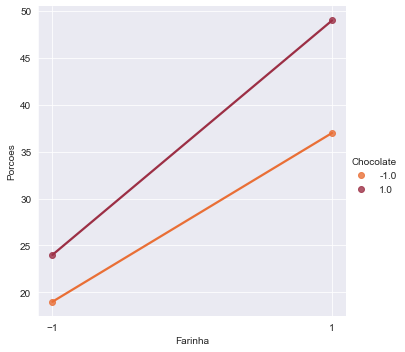

In [35]:
ax = sns.lmplot(x = 'Farinha',
                y = 'Porcoes',
                hue = 'Chocolate',
                data = experimento,
                ci = None)
ax.set(xticks = (-1,1))
# A linha vermelha representa o feito da farinha quando o chocolate está em um nivel superior
# E a linha laranja representa quando o nivel de chocolate está no nivel inferior

### Para o chocolate

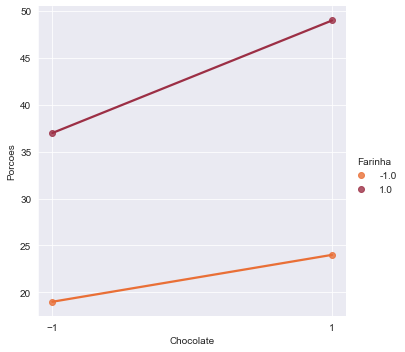

In [36]:
ax = sns.lmplot(x = 'Chocolate',
                y = 'Porcoes',
                hue = 'Farinha',
                data = experimento,
                ci = None)
ax.set(xticks = (-1,1))
# A linha vermelha representa o efeito do chocolate quando a farinha está num nivel superior
# A linha laranja representa o efeito do chocolate quando a farinha está num nivel inferior

In [ ]:
# Avaliando os dois gráficos, é possível perceber que a farinha tem um impacto maior na quantidade
de cupcakes que é possível fazer.
# Provavelmente a farinha tem maior importância na definição do número de cupcakes que será produzido
# ao final da receita.

# <font color = 'purple'> Ajustando o modelo estatístico </font>


<p style='margin: 30px 30px;'>
    
<hr style = 'border: 1px solid purple;'>

<hr>

<img width='800px' src='figuras/Figura_3.png'>

<p style='margin: 30px 30px;'> 

<hr>


### Bibliotecas  Stats Model


In [39]:
import statsmodels.api as sm
import statsmodels.formula.api as smf # ajustar a formula

### .

In [40]:
# ajustar os coeficientes do modelo
modelo = smf.ols(data = experimento, formula = 'Porcoes ~ Farinha + Chocolate + Farinha:Chocolate')

In [41]:
modelo_ajustado = modelo.fit()

In [45]:
print(modelo_ajustado.summary())
# O intercepto representa as médias das porções do experimento da bel
# Os outros coeficientes (betas)
# Os coeficientes diferentes de 0 eles influenciam a quantidade de cupcakes produzidos 
# A quantidade de farinha tem maior influência na quantidade de cupcakes produzidos
# beta0 é um valor constante
# os graus de liberdade dos resíduos é 0

                            OLS Regression Results                            
Dep. Variable:                Porcoes   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Mon, 21 Mar 2022   Prob (F-statistic):                nan
Time:                        22:37:01   Log-Likelihood:                    inf
No. Observations:                   4   AIC:                              -inf
Df Residuals:                       0   BIC:                              -inf
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            32.2500        na

C:\Users\villa\anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


# <font color = 'purple'> Aumentando os Graus de liberdade  </font>


<p style='margin: 30px 30px;'>
    
<hr style = 'border: 1px solid purple;'>



<p style='margin: 30px 30px;'>     
    


<hr>


<p style='font-size: 18px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'>
    <font color="red"> <b>Replicatas no centro</b>


<img width='800px' src='figuras/Figura_5.png'> 


<p style='margin: 30px 30px;'> 
    
    
 
    

    
<hr>    

In [ ]:
# Vamos realizar os ensaios em um mesmo ponto central, ou seja, mesmas proporções de farinha/chocolate

In [47]:
centro = np.array([ [0, 0, 29],
                    [0, 0, 30],
                    [0, 0, 29],
                    [0, 0, 30],
                  ])

In [58]:
centro_dataframe = pd.DataFrame(centro,
                                columns = ['Farinha', 'Chocolate', 'Porcoes'],
                                index = [4, 5, 6, 7])
centro_dataframe

,Farinha,Chocolate,Porcoes
4,0,0,29
5,0,0,30
6,0,0,29
7,0,0,30


### .

In [62]:
experimento = experimento.append(centro_dataframe)

In [63]:
experimento
# agora temos 8 graus de liberdade iniciais
# Nosso modelo consome 4 graus de liberdade para ser ajudatado
# 8-4 = 4 graus de liberdade para resíduos

,Farinha,Chocolate,Porcoes
0,-1.0,-1.0,19
1,1.0,-1.0,37
2,-1.0,1.0,24
3,1.0,1.0,49
4,0.0,0.0,29
5,0.0,0.0,30
6,0.0,0.0,29
7,0.0,0.0,30


# <font color = 'purple'>  Análise de significância estatística   </font>


<p style='margin: 30px 30px;'>
    
<hr style = 'border: 1px solid purple;'>

In [65]:
modelo = smf.ols(data = experimento, formula = 'Porcoes ~ Farinha + Chocolate + Farinha : Chocolate')

In [66]:
modelo_ajustado = modelo.fit()

In [67]:
print(modelo_ajustado.summary())
# Como os graus de liberdade dos residuos é 4 (maior que 0)
# Podemos usar os testes estatísticos de significancia 
# Os coeficientes mudaram de valor pois acrescentamos mais dados
# Porem a farinha continua com um efeito maior na receita, como anteriormente 

                            OLS Regression Results                            
Dep. Variable:                Porcoes   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     45.21
Date:                Mon, 21 Mar 2022   Prob (F-statistic):            0.00152
Time:                        22:59:55   Log-Likelihood:                -14.155
No. Observations:                   8   AIC:                             36.31
Df Residuals:                       4   BIC:                             36.63
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            30.8750      0.71

C:\Users\villa\anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<p style='margin: 200px 200px;'>    


<hr>


    
 <img width='400px' src='figuras/Figura_6.png'> 


<p style='margin: 30px 30px;'>    

<hr>


 <img width='600px' src='figuras/Figura_7.png'> 


<p style='margin: 30px 30px;'>        
    
    
 <hr>   
    

  
 <img width='600px' src='figuras/Figura_10.png'> 


<p style='margin: 30px 30px;'>       
  
<hr>        


# <font color = 'purple'> Teste de significância estatística usando o <b>t<b>    </font>


<p style='margin: 30px 30px;'>
    
<hr style = 'border: 1px solid purple;'>





<hr>
<img width='600px' src='figuras/Figura_11.png'> 


<hr>
  <p style='margin: 30px 30px;'>     
<img width='900px' src='figuras/Figura_8.png'> 


<hr>



<p style='margin: 30px 30px;'>     
<img width='500px' src='figuras/Figura_20.png'

<hr>
<p style='margin: 30px 30px;'>    

<p style='margin: 30px 30px;'>     
<img width='500px' src='figuras/hipotese_nula.jpg'



<hr>
<p style='margin: 30px 30px;'>    


Se P > |t|, ou seja, maior que o alpha defindo, assumimos a hipótese nula, declaramos 
que não há relação entre os dois fenômenos de interesse.


In [77]:
t_valores = modelo_ajustado.tvalues

In [78]:
t_valores

Intercept            43.494275
Farinha              10.708252
Chocolate             4.233495
Farinha:Chocolate     1.743204
dtype: float64

### .

In [80]:
nome = t_valores.index.tolist()

### .


In [81]:
nome

['Intercept', 'Farinha', 'Chocolate', 'Farinha:Chocolate']

In [92]:
from scipy import stats

In [93]:
distribuicao = stats.t(df = 8 - 4) # passamos os graus de liberdade dos resíduos

In [94]:
distribuicao.ppf(q = 1 - 0.05/2)

2.7764451051977987

In [96]:
limite = [distribuicao.ppf(q = 1 - 0.05/2)]*len(nome)

In [98]:
limite

[2.7764451051977987,
 2.7764451051977987,
 2.7764451051977987,
 2.7764451051977987]

### Plotando o gráfico 

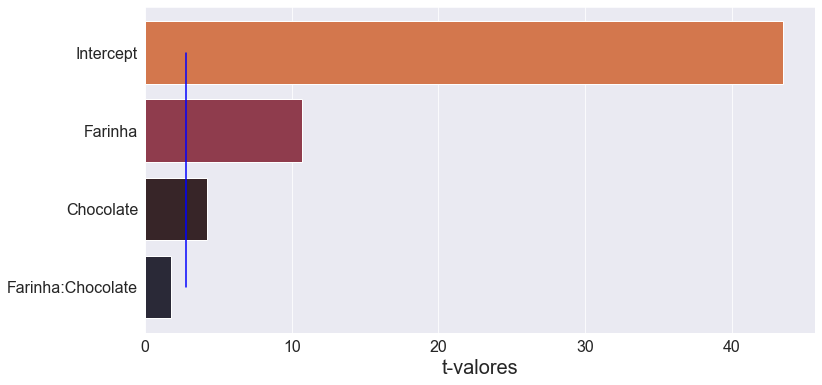

In [100]:
# Gráfico de pareto
ax = sns.barplot(x = t_valores, y = nome) 
ax.figure.set_size_inches(12,6)
ax.tick_params(labelsize = 16)
ax.set_xlabel('t-valores', fontsize= 20)

ax.plot(limite, nome, 'b')

#### t- tabelado = linha azul 
#### Podemos ver que o intercepto é maior que o t-tabelado, ou seja, o t-calculado é maior que o t-tabelado logo, é ele é estatisticamente significativo. 
#### Rejeitamos a hipotese nula, para o intercepto, para a farinha e para o chocolate. 
#### Porém para a relação farinha:chocolate apresenta um t-calculado menor que o tabelado, não podemos rejeitar a hipótese nula. Teremos que dizer que ele não é estatisticamente significativo.

# <font color = 'purple'> Propondo um novo modelo   </font>


<p style='margin: 30px 30px;'>
    
<hr style = 'border: 1px solid purple;'>


<hr>

<img width='700px' src='figuras/Figura_3.png'>

<p style='margin: 30px 30px;'> 

<hr>

<p style='margin: 30px 30px;'>


<hr>

<img width='500px' src='figuras/Figura_9.png'> 

<p style='font-size: 18px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'>


<p style='margin: 30px 30px;'>

    
<hr>    


#### Como vimos, a interação farinha:chocolate não era estatisticamente significativa, então retiramos ela do nosso modelo estatístico

In [101]:
modelo_2 = smf.ols(data = experimento, formula = 'Porcoes ~ Farinha + Chocolate')

In [102]:
modelo_ajustado_2 = modelo_2.fit()

In [105]:
print(modelo_ajustado_2.summary())

# Agora temos 5 graus de liberdade(8-3) porque reduzimos o número de parâmetros do nosso modelo
# e continuamos com o mesmo número de experimentos.
# os coeficientes seguem parecidos, a farinha é a que apresenta maior efeito na quantidade de 
# cupcakes produzida.

                            OLS Regression Results                            
Dep. Variable:                Porcoes   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     47.09
Date:                Mon, 21 Mar 2022   Prob (F-statistic):           0.000571
Time:                        23:57:17   Log-Likelihood:                -16.416
No. Observations:                   8   AIC:                             38.83
Df Residuals:                       5   BIC:                             39.07
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.8750      0.842     36.658      0.0

C:\Users\villa\anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [ ]:
# Rejeitamos a hipótese nula para o intersepto, farinha e chocolate pois P > |t| é menor que 5% = 0.05

# <font color = 'purple'> Gráfico Padronizado de Pareto do novo modelo    </font>


<p style='margin: 30px 30px;'>
    
<hr style = 'border: 1px solid purple;'>


In [106]:
t_valores = modelo_ajustado_2.tvalues

In [107]:
t_valores

Intercept    36.658022
Farinha       9.025173
Chocolate     3.568092
dtype: float64

In [109]:
nome = t_valores.index.tolist()
nome

['Intercept', 'Farinha', 'Chocolate']

### .

In [115]:
distribuicao = stats.t(df = (8-3))

In [116]:
distribuicao.ppf(q = 1 - 0.05/2)

2.5705818366147395

In [118]:
limite = [distribuicao.ppf(q = 1 - 0.05/2)]*len(nome)
limite

[2.5705818366147395, 2.5705818366147395, 2.5705818366147395]

### Plotando o gráfico

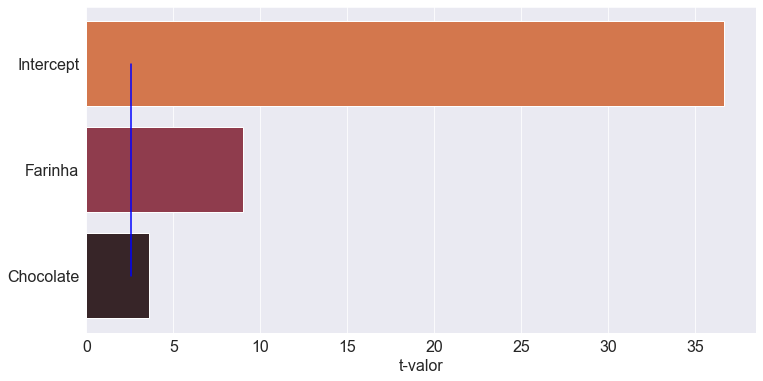

In [119]:
ax = sns.barplot(x = t_valores, y =nome)
ax.figure.set_size_inches(12,6)
ax.tick_params(labelsize = 16)
ax.set_xlabel('t-valor', fontsize = 16)

ax.plot(limite, nome, 'b')


#### O intercepto possui um valor t-calculado > que o valor t-tabelado, é estatisticamente significativo.
#### A farinha possui um valor t-calculado > que o valor t-tabelado, é estatisticamente significativo.
#### O chocolate possui um valor t-calculado > que o valor t-tabelado, é estatisticamente significativo.

<font color='red' style='font-size: 30px;'> Preditos por observados  </font>
<hr style='border: 2px solid red;'>

In [121]:
observados = experimento['Porcoes']

In [122]:
observados

0    19
1    37
2    24
3    49
4    29
5    30
6    29
7    30
Name: Porcoes, dtype: int64

### .

In [123]:
preditos = modelo_ajustado_2.predict()

In [124]:
preditos

array([15.875, 37.375, 24.375, 45.875, 30.875, 30.875, 30.875, 30.875])

### .

In [125]:
import matplotlib.pyplot as plt

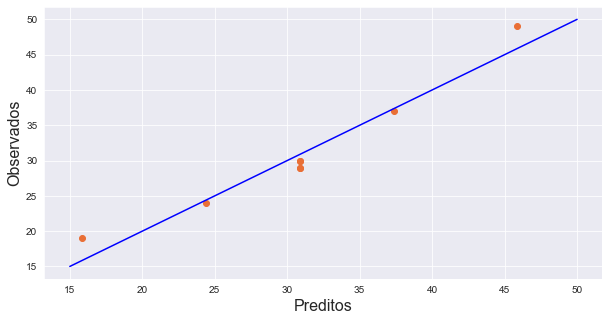

In [132]:
plt.figure(figsize = (10,5))
plt.xlabel('Preditos', fontsize = 16)
plt.ylabel('Observados', fontsize = 16)
plt.plot(x,y,'b')

# Linha de guia 
x = np.linspace(start = 15, stop = 50, num = 10) # vimos os extremos dos valores preditos.
y = np.linspace(start = 15, stop = 50, num = 10)

# Comparacao 
plt.scatter(preditos, observados)

<hr>

In [133]:
print(modelo_ajustado_2.summary())
# como temos um R-squared muito proximo de 1, 0.95, significa que os valores preditos pelo nosso modelo
# estao bem proximos dos valores observados pela Bel.


                            OLS Regression Results                            
Dep. Variable:                Porcoes   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     47.09
Date:                Tue, 22 Mar 2022   Prob (F-statistic):           0.000571
Time:                        00:58:27   Log-Likelihood:                -16.416
No. Observations:                   8   AIC:                             38.83
Df Residuals:                       5   BIC:                             39.07
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.8750      0.842     36.658      0.0

C:\Users\villa\anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


### .

# <font color = 'purple'> Explorando o modelo   </font>


<p style='margin: 30px 30px;'>
    
<hr style = 'border: 1px solid purple;'>

In [134]:
parametros = modelo_ajustado_2.params

In [135]:
parametros

Intercept    30.875
Farinha      10.750
Chocolate     4.250
dtype: float64

### .

### Definindo a função

In [172]:
def modelo_receita(x_farinha, x_chocolate):
    #limite 
    limite_normalizado = [-1, 1]
    limite_farinha = [0.5, 1.5]
    limite_chocolate = [0.1, 0.5]
    #vamos interpolar os valores reais para valores normalizados
    x_farinha_convertido = np.interp(x_farinha, limite_farinha, limite_normalizado)
    x_chocolate_convertido = np.interp(x_chocolate, limite_chocolate, limite_normalizado)
    
    porcoes = parametros['Intercept'] + parametros['Farinha']*x_farinha_convertido +parametros['Chocolate']*x_chocolate_convertido
    return porcoes.round(0)

In [173]:
# Lembrar que o modelo foi ajustado para a forma normalizada
# como mostra a figura abaixo


<p style='margin: 150px 150px;'>


<hr>

<img width='700px' src='figuras/Figura_22.png'> 


<hr>

In [179]:
modelo_receita(1, 1)

# Vamos ajustar nossa funcao para que ela interpole os valores entre -1 e 1

# A Bel ganhou uma ferramenta onde ela pode prever a quantidade de cupcakes produzidos
# em funcao da quantidade de farinha e chocolate

35.0

# <font color = 'purple'> Mapa de cores   </font>


<p style='margin: 30px 30px;'>
    
<hr style = 'border: 1px solid purple;'>


<p style='margin: 150px 150px;'>


<hr>

<img width='700px' src='figuras/Figura_23.jpg'> 

#### Fonte: National Centers for Environmental Prediction


<hr>



<p style='margin: 30px 30px;'>




<p style='margin: 30px 30px;'>


<hr>

<img width='600px' src='figuras/Figura_24.png'> 


<hr>



<p style='margin: 30px 30px;'>

In [181]:
x_farinha = np.linspace(start = 0.5, stop = 1.5, num =10)
x_farinha 

array([0.5       , 0.61111111, 0.72222222, 0.83333333, 0.94444444,
       1.05555556, 1.16666667, 1.27777778, 1.38888889, 1.5       ])

In [183]:
x_chocolate = np.linspace(start = 0.1, stop = 0.5, num =10)
x_chocolate 

array([0.1       , 0.14444444, 0.18888889, 0.23333333, 0.27777778,
       0.32222222, 0.36666667, 0.41111111, 0.45555556, 0.5       ])

### . 

In [184]:
pontos = []

for cont1 in x_farinha:
    temp = []
    for cont2 in x_chocolate:
        temp.append(modelo_receita(cont1, cont2))
    pontos.append(temp)

In [185]:
pontos

[[16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 22.0, 23.0, 24.0],
 [18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0],
 [21.0, 22.0, 23.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0],
 [23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0],
 [25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0],
 [28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 33.0, 34.0, 35.0, 36.0],
 [30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0],
 [33.0, 34.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0],
 [35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 43.0],
 [37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0]]

### .

### Construindo a superfície de resposta

In [186]:
import matplotlib.cm as cm

https://matplotlib.org/users/colormaps.html

<a list of 7 text.Text objects>

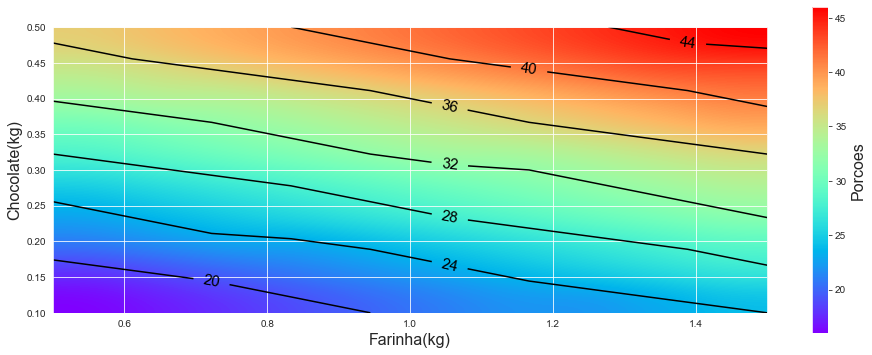

In [199]:
# base
plt.figure(figsize = (16,6))
plt.xlabel('Farinha(kg)', fontsize = 16)
plt.ylabel('Chocolate(kg)', fontsize = 16)

# Mapa de cores
mapa_cor = plt.imshow(pontos, origin = 'lower', cmap = cm.rainbow, interpolation = 'quadric', extent = (0.5, 1.5, 0.1, 0.5))

# barra de cor
plt.colorbar().set_label('Porcoes', fontsize = 16)

#linha
linhas = plt.contour(x_farinha, x_chocolate, pontos, colors = 'k', linewidths = 1.5)
plt.clabel(linhas, inline = True, fmt = '%1.0f', fontsize = 15.0, inline_spacing = 10)